# Project For Data Science Term 2

## Profit and Waste Analysis of Repeating Menu Systems in a Filipino Eatery

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylatex


# data = pd.read_excel("filipino_eatery_realistic_month.xlsx")
data=pd.read_excel("final_realism_upgraded_dataset.xlsx")
data

,Date,Day,Dish,Dish_Type,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit
0,2025-01-06,Monday,Sinigang na Baboy,Soup,556,60,12,12,0,720,164
1,2025-01-06,Monday,Chicken Adobo,Chicken,619,60,13,10,3,600,-19
2,2025-01-06,Monday,Dinakdakan,Pork,969,80,14,13,1,1040,71
3,2025-01-06,Monday,Dinakdakan,Pork,865,80,12,11,1,880,15
4,2025-01-06,Monday,Paksiw na Bangus,Fish,336,60,15,15,0,900,564
...,...,...,...,...,...,...,...,...,...,...,...
175,2025-02-01,Saturday,Pork Adobo,Pork,558,60,13,12,1,720,162
176,2025-02-01,Saturday,Fried Salmon,Fish,291,50,14,12,2,600,309
177,2025-02-01,Saturday,Fried Salmon,Fish,303,50,15,14,1,700,397
178,2025-02-01,Saturday,Chopsuey,Vegetable,270,40,15,15,0,600,330


### Derived Metrics

In [23]:
# Create derived metrics
data['Waste_Rate'] = data['Unsold'] / data['Total_Serving']
data['Profit_Margin'] = data['Profit'] / data['Revenue']
data['Sell_Through_Rate'] = data['Sold'] / data['Total_Serving']

In [24]:
# aggregate by week
data['Date'] = pd.to_datetime(data['Date'])
data['Week'] = data['Date'].dt.isocalendar().week
data['Week'] = data['Week'] - data['Week'].min() + 1  # normalize to start at 1

weekly_summary = data.groupby('Week').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Price_PHP=('Price_PHP', 'sum'),
    Total_Serving=('Total_Serving', 'sum'),
    Number_Sold=('Sold', 'sum'),
    Unsold_Quantity=('Unsold', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
)

weekly_summary['Loss_PHP'] = (data['Price_PHP'] * data['Unsold']).groupby(data['Week']).sum()

weekly_summary

,Cost_PHP,Price_PHP,Total_Serving,Number_Sold,Unsold_Quantity,Revenue,Profit,Loss_PHP
Week,,,,,,,,
1,25534,2770,582,546,36,33730,8196,2120
2,27297,2820,601,563,38,34570,7273,2210
3,24042,2630,586,545,41,32620,8578,2430
4,26349,2740,593,555,38,33890,7541,2170


In [25]:
data.head()

,Date,Day,Dish,Dish_Type,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit,Waste_Rate,Profit_Margin,Sell_Through_Rate,Week
0,2025-01-06,Monday,Sinigang na Baboy,Soup,556,60,12,12,0,720,164,0.000000,0.227778,1.000000,1
1,2025-01-06,Monday,Chicken Adobo,Chicken,619,60,13,10,3,600,-19,0.230769,-0.031667,0.769231,1
2,2025-01-06,Monday,Dinakdakan,Pork,969,80,14,13,1,1040,71,0.071429,0.068269,0.928571,1
3,2025-01-06,Monday,Dinakdakan,Pork,865,80,12,11,1,880,15,0.083333,0.017045,0.916667,1
4,2025-01-06,Monday,Paksiw na Bangus,Fish,336,60,15,15,0,900,564,0.000000,0.626667,1.000000,1


### Exploratory Data Analysis

In [26]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[us]
 1   Day                180 non-null    str           
 2   Dish               180 non-null    str           
 3   Dish_Type          180 non-null    str           
 4   Cost_PHP           180 non-null    int64         
 5   Price_PHP          180 non-null    int64         
 6   Total_Serving      180 non-null    int64         
 7   Sold               180 non-null    int64         
 8   Unsold             180 non-null    int64         
 9   Revenue            180 non-null    int64         
 10  Profit             180 non-null    int64         
 11  Waste_Rate         180 non-null    float64       
 12  Profit_Margin      180 non-null    float64       
 13  Sell_Through_Rate  180 non-null    float64       
 14  Week               18

In [27]:
data.describe()

,Date,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit,Waste_Rate,Profit_Margin,Sell_Through_Rate,Week
count,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0
mean,2025-01-18 22:24:00,573.455556,60.888889,13.122222,12.272222,0.850000,748.944444,175.488889,0.064091,0.240107,0.935909,2.494444
min,2025-01-06 00:00:00,227.000000,40.000000,10.000000,9.000000,0.000000,400.000000,-247.000000,0.000000,-0.411667,0.750000,1.0
25%,2025-01-12 12:00:00,322.250000,60.000000,12.000000,11.000000,0.000000,600.000000,29.000000,0.000000,0.034226,0.904167,1.75
50%,2025-01-18 00:00:00,610.000000,60.000000,13.000000,12.000000,1.000000,720.000000,184.000000,0.066667,0.217917,0.933333,2.0
75%,2025-01-25 12:00:00,767.000000,70.000000,14.000000,14.000000,1.250000,850.000000,297.000000,0.095833,0.488542,1.000000,3.25
max,2025-02-01 00:00:00,1012.000000,80.000000,15.000000,15.000000,3.000000,1200.000000,627.000000,0.250000,0.696667,1.000000,4.0
std,NaN,233.560187,11.641233,1.388925,1.563660,0.948242,184.152891,178.955707,0.072163,0.253175,0.072163,1.121139


In [28]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[us]
 1   Day                180 non-null    str           
 2   Dish               180 non-null    str           
 3   Dish_Type          180 non-null    str           
 4   Cost_PHP           180 non-null    int64         
 5   Price_PHP          180 non-null    int64         
 6   Total_Serving      180 non-null    int64         
 7   Sold               180 non-null    int64         
 8   Unsold             180 non-null    int64         
 9   Revenue            180 non-null    int64         
 10  Profit             180 non-null    int64         
 11  Waste_Rate         180 non-null    float64       
 12  Profit_Margin      180 non-null    float64       
 13  Sell_Through_Rate  180 non-null    float64       
 14  Week               18

In [29]:
data.groupby('Dish').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Dish,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,Beef Steak,10160,13040,2880,400,0.029365,0.216245,0.970635
1,Chicken Adobo,2519,2400,-119,600,0.200321,-0.052172,0.799679
2,Chicken BBQ,1282,1150,-132,150,0.107143,-0.114545,0.892857
3,Chicken Curry,6498,6480,-18,960,0.132519,-0.029986,0.867481
4,Chopsuey,2251,4480,2229,280,0.058893,0.491883,0.941107
5,Dinakdakan,10326,11440,1114,320,0.028139,0.089863,0.971861
6,Fried Salmon,2944,6200,3256,500,0.076337,0.518489,0.923663
7,Fried Tilapia,1729,4560,2831,420,0.088217,0.611713,0.911783
8,Ginataang Kalabasa,1225,2680,1455,120,0.042051,0.540939,0.957949
9,Ginataang Pagi,3420,4440,1020,240,0.052503,0.218704,0.947497


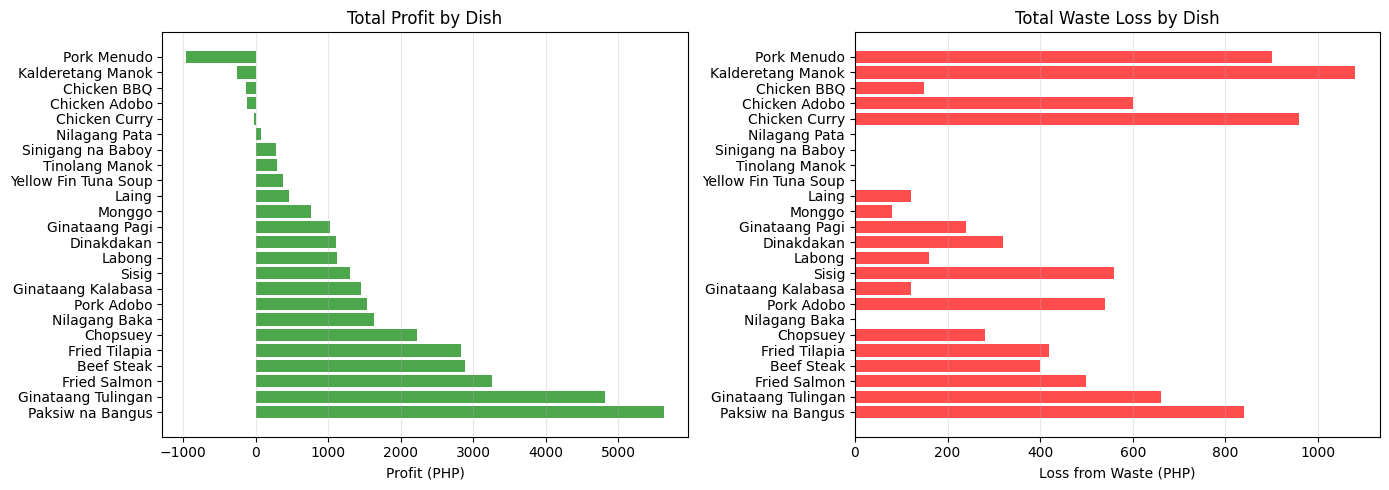

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dish_summary = data.groupby('Dish').agg(
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum())
).sort_values('Profit', ascending=False)

# Plot 1: Profit by Dish
axes[0].barh(dish_summary.index, dish_summary['Profit'], color='green', alpha=0.7)
axes[0].set_xlabel('Profit (PHP)')
axes[0].set_title('Total Profit by Dish')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Waste (Loss) by Dish
axes[1].barh(dish_summary.index, dish_summary['Loss_PHP'], color='red', alpha=0.7)
axes[1].set_xlabel('Loss from Waste (PHP)')
axes[1].set_title('Total Waste Loss by Dish')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
data.groupby('Dish_Type').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Dish_Type,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,Beef,10160,13040,2880,400,0.029365,0.216245,0.970635
1,Chicken,16550,16030,-520,2790,0.149168,-0.051121,0.850832
2,Fish,17099,34640,17541,2660,0.072707,0.498084,0.927293
3,Pork,38657,41660,3003,2320,0.055922,0.057715,0.944078
4,Soup,14746,17400,2654,0,0.000000,0.136955,1.000000
5,Vegetable,6010,12040,6030,760,0.059577,0.495252,0.940423


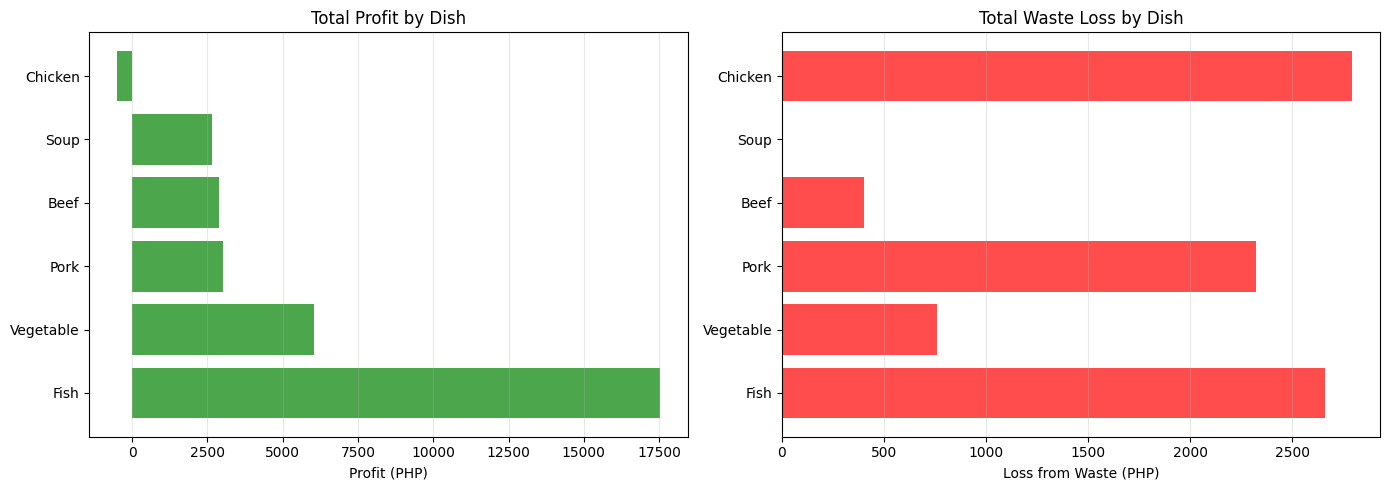

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dish_summary = data.groupby('Dish_Type').agg(
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum())
).sort_values('Profit', ascending=False)

# Plot 1: Profit by Dish
axes[0].barh(dish_summary.index, dish_summary['Profit'], color='green', alpha=0.7)
axes[0].set_xlabel('Profit (PHP)')
axes[0].set_title('Total Profit by Dish')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Waste (Loss) by Dish
axes[1].barh(dish_summary.index, dish_summary['Loss_PHP'], color='red', alpha=0.7)
axes[1].set_xlabel('Loss from Waste (PHP)')
axes[1].set_title('Total Waste Loss by Dish')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
data.groupby('Week').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Week,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,1,25534,33730,8196,2120,0.063077,0.246352,0.936923
1,2,27297,34570,7273,2210,0.060424,0.224773,0.939576
2,3,24042,32620,8578,2430,0.068419,0.268632,0.931581
3,4,26349,33890,7541,2170,0.064624,0.221647,0.935376


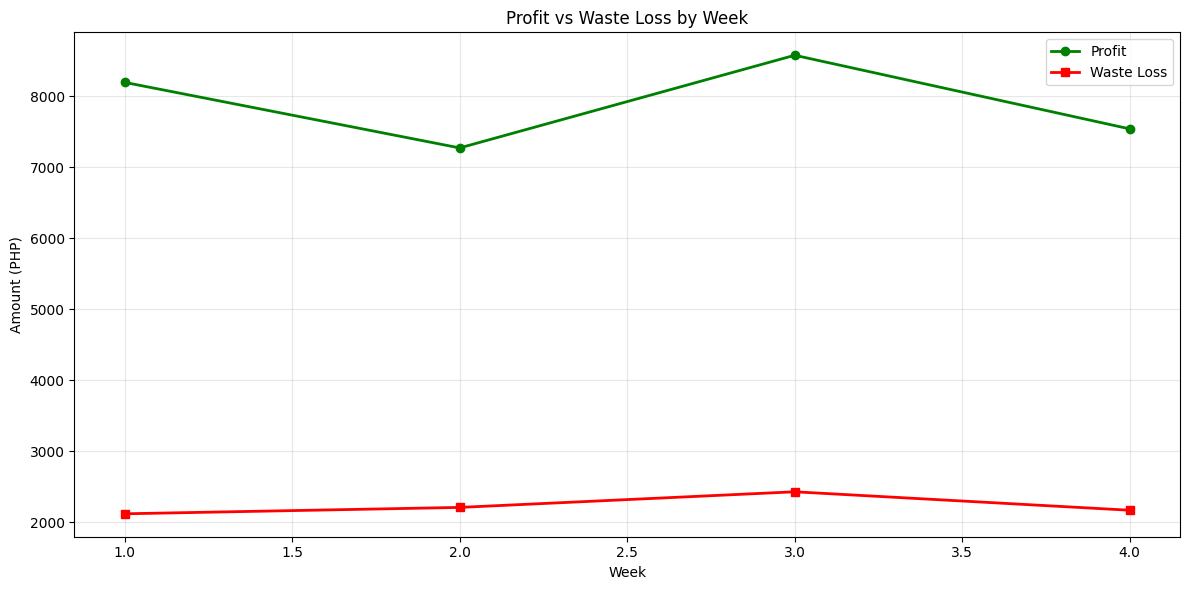

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(weekly_summary.index, weekly_summary['Profit'], marker='o', label='Profit', color='green', linewidth=2)
ax.plot(weekly_summary.index, weekly_summary['Loss_PHP'], marker='s', label='Waste Loss', color='red', linewidth=2)

ax.set_xlabel('Week')
ax.set_ylabel('Amount (PHP)')
ax.set_title('Profit vs Waste Loss by Week')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Analysis

In [36]:
data.groupby("Dish_Type").agg(
    Profit=('Profit', 'mean'),
    Waste_Rate=('Waste_Rate', 'mean'),
    Sold=('Sold', 'mean'),
    Unsold=('Unsold', 'mean')
)


,Profit,Waste_Rate,Sold,Unsold
Dish_Type,,,,
Beef,240.000000,0.029365,13.583333,0.416667
Chicken,-21.666667,0.149168,11.291667,1.958333
Fish,365.437500,0.072707,12.458333,0.958333
Pork,62.562500,0.055922,12.750000,0.750000
Soup,110.583333,0.000000,11.000000,0.000000
Vegetable,251.250000,0.059577,12.541667,0.791667


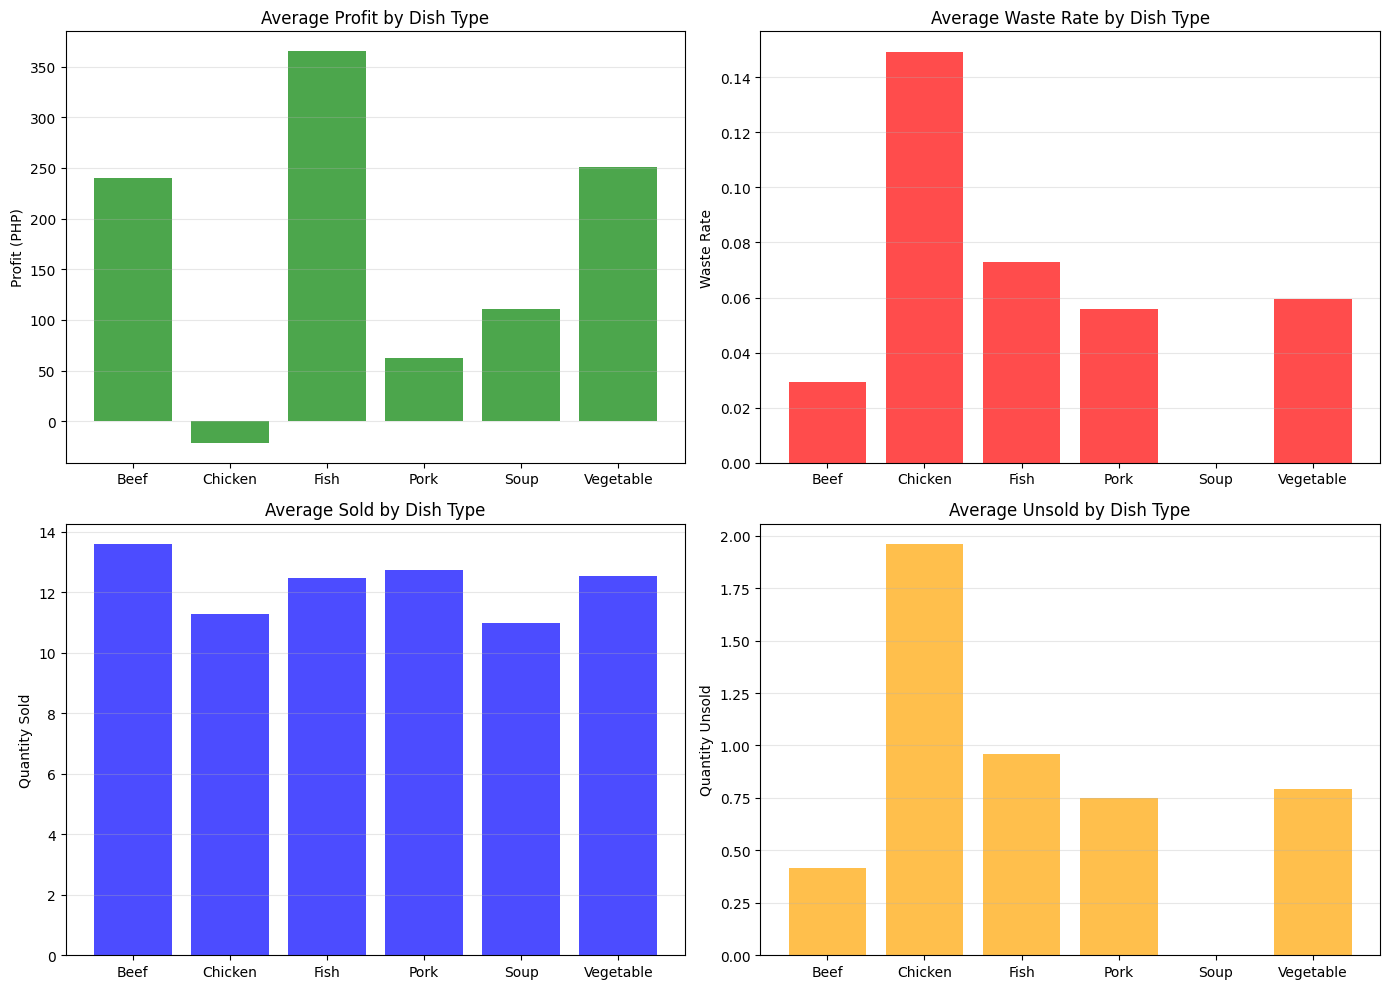

In [37]:
dish_type_summary = data.groupby("Dish_Type").agg(
    Profit=('Profit', 'mean'),
    Waste_Rate=('Waste_Rate', 'mean'),
    Sold=('Sold', 'mean'),
    Unsold=('Unsold', 'mean')
)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(dish_type_summary.index, dish_type_summary['Profit'], color='green', alpha=0.7)
axes[0, 0].set_title('Average Profit by Dish Type')
axes[0, 0].set_ylabel('Profit (PHP)')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].bar(dish_type_summary.index, dish_type_summary['Waste_Rate'], color='red', alpha=0.7)
axes[0, 1].set_title('Average Waste Rate by Dish Type')
axes[0, 1].set_ylabel('Waste Rate')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].bar(dish_type_summary.index, dish_type_summary['Sold'], color='blue', alpha=0.7)
axes[1, 0].set_title('Average Sold by Dish Type')
axes[1, 0].set_ylabel('Quantity Sold')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].bar(dish_type_summary.index, dish_type_summary['Unsold'], color='orange', alpha=0.7)
axes[1, 1].set_title('Average Unsold by Dish Type')
axes[1, 1].set_ylabel('Quantity Unsold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
data.groupby("Dish").agg(
    Profit=('Profit', 'mean'),
    Waste_Rate=('Waste_Rate', 'mean'),
    Sold=('Sold', 'mean'),
    Unsold=('Unsold', 'mean')
)


,Profit,Waste_Rate,Sold,Unsold
Dish,,,,
Beef Steak,240.000000,0.029365,13.583333,0.416667
Chicken Adobo,-29.750000,0.200321,10.000000,2.500000
Chicken BBQ,-66.000000,0.107143,11.500000,1.500000
Chicken Curry,-2.000000,0.132519,12.000000,1.777778
Chopsuey,247.666667,0.058893,12.444444,0.777778
Dinakdakan,101.272727,0.028139,13.000000,0.363636
Fried Salmon,325.600000,0.076337,12.400000,1.000000
Fried Tilapia,471.833333,0.088217,12.666667,1.166667
Ginataang Kalabasa,291.000000,0.042051,13.400000,0.600000


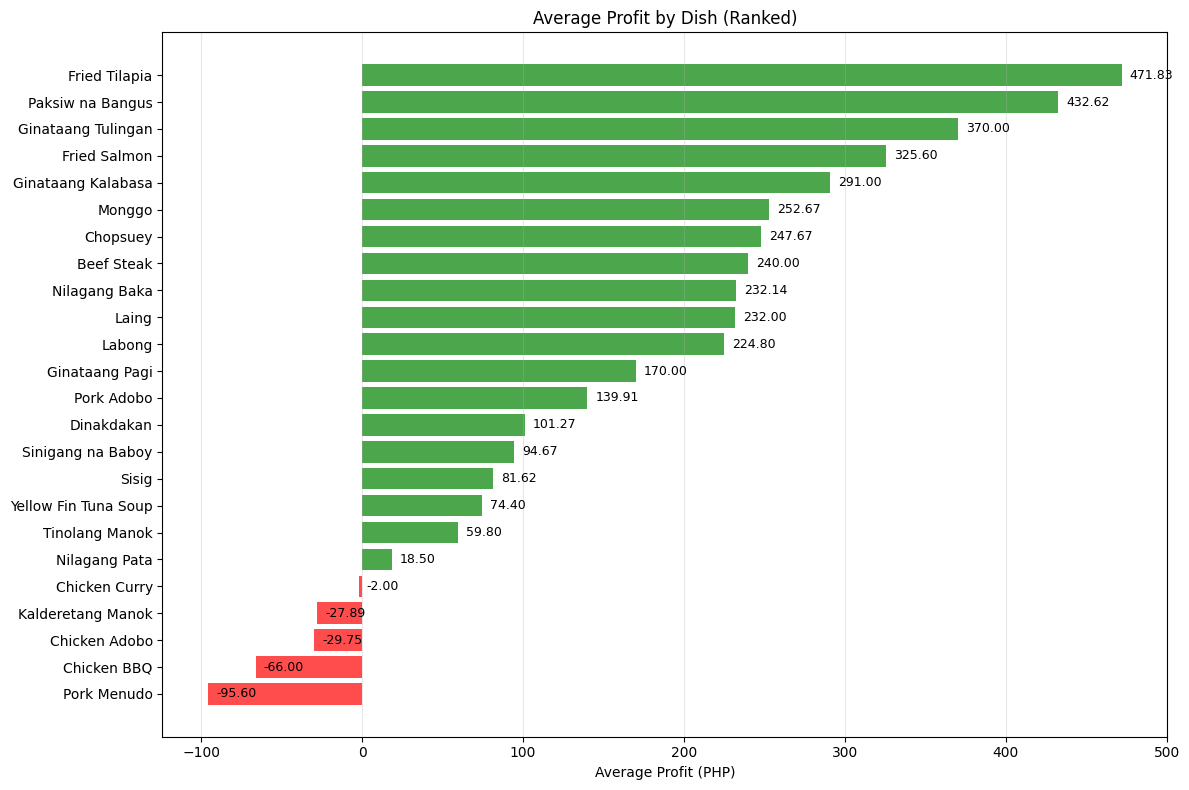

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(dish_profit.index, dish_profit.values, color=['green' if x > 0 else 'red' for x in dish_profit.values], alpha=0.7)
ax.set_xlabel('Average Profit (PHP)')
ax.set_title('Average Profit by Dish (Ranked)')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(dish_profit.values):
    ax.text(v + 5, i, f'{v:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

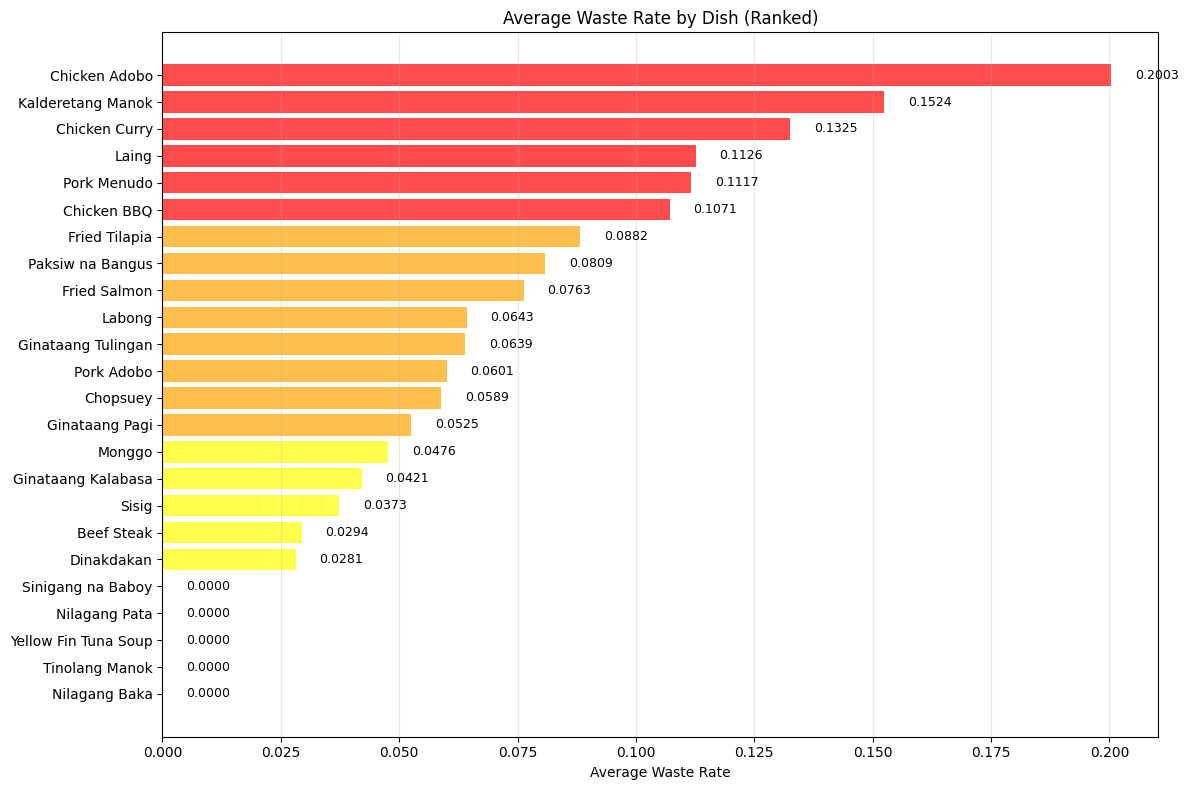

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(dish_waste.index, dish_waste.values, color=['red' if x > 0.10 else 'orange' if x > 0.05 else 'yellow' for x in dish_waste.values], alpha=0.7)
ax.set_xlabel('Average Waste Rate')
ax.set_title('Average Waste Rate by Dish (Ranked)')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(dish_waste.values):
    ax.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

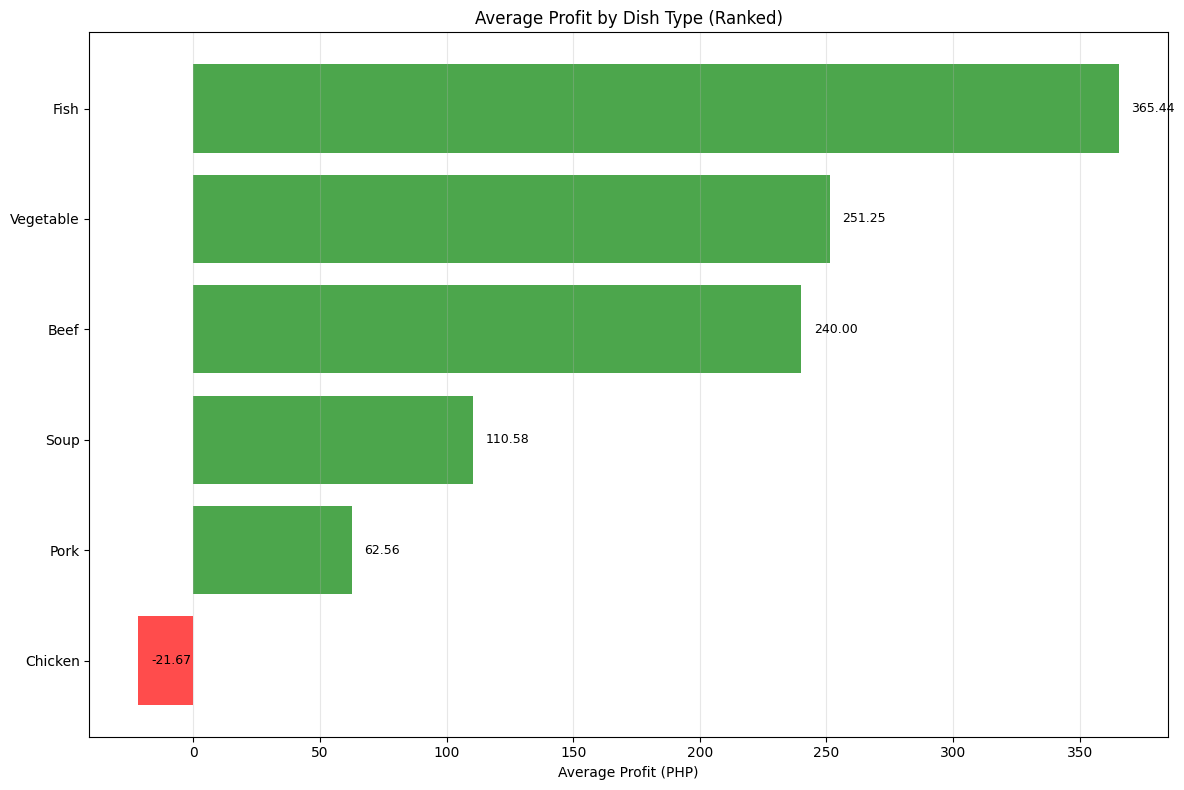

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(dish_type_profit.index, dish_type_profit.values, color=['green' if x > 0 else 'red' for x in dish_type_profit.values], alpha=0.7)
ax.set_xlabel('Average Profit (PHP)')
ax.set_title('Average Profit by Dish Type (Ranked)')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(dish_type_profit.values):
    ax.text(v + 5, i, f'{v:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()




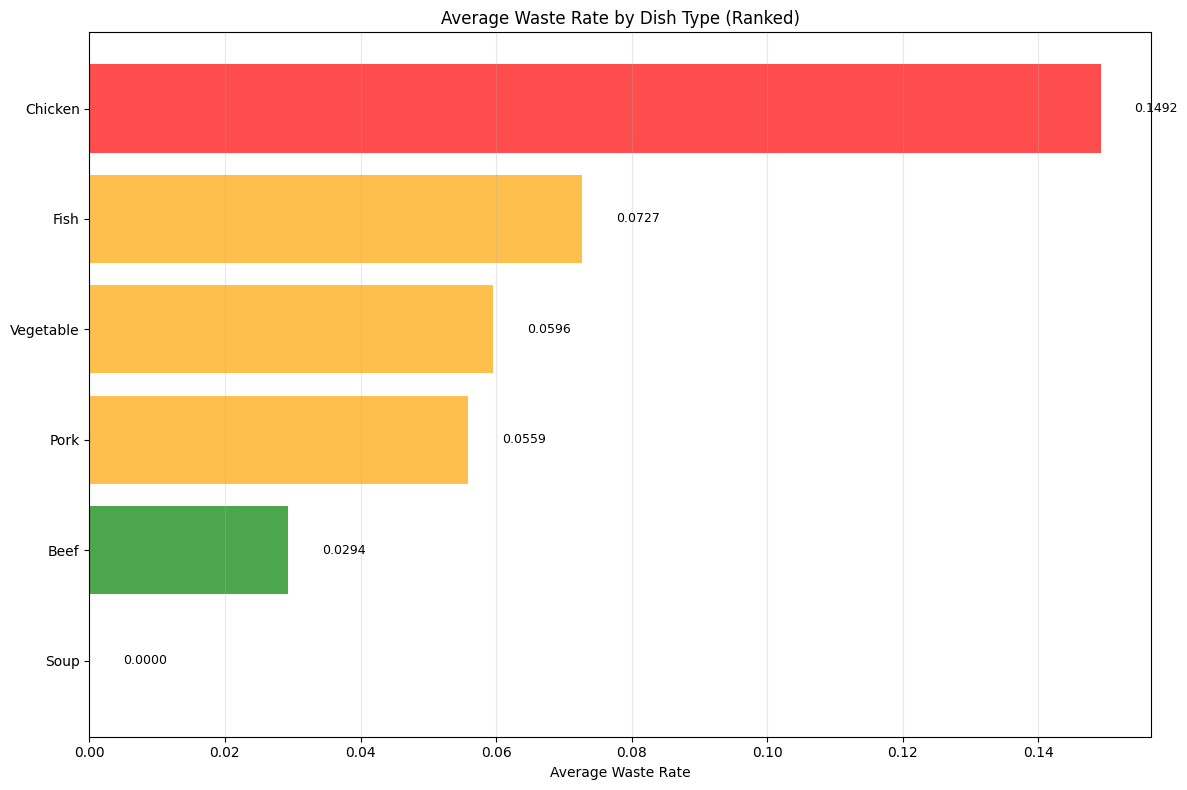

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(dish_type_waste.index, dish_type_waste.values, color=['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' for x in dish_type_waste.values], alpha=0.7)
ax.set_xlabel('Average Waste Rate')
ax.set_title('Average Waste Rate by Dish Type (Ranked)')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(dish_type_waste.values):
    ax.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

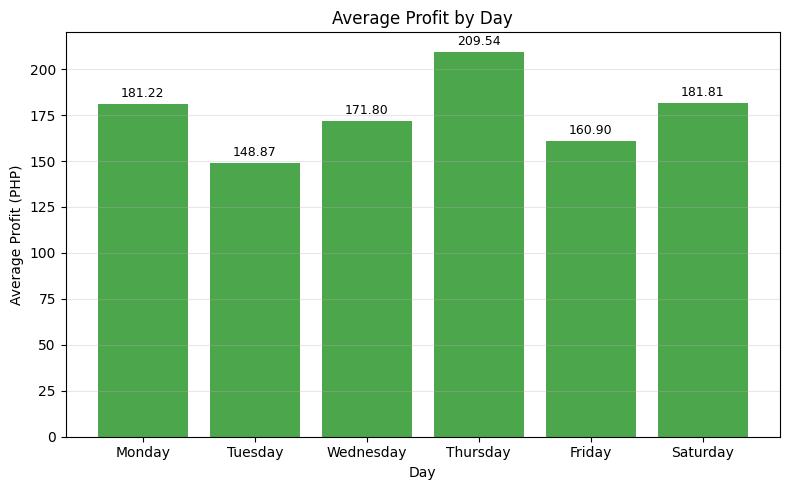

In [54]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avg_profit_by_day = data.groupby("Day")["Profit"].mean().reindex(day_order).dropna()

fig_day, ax_day = plt.subplots(figsize=(8, 5))
ax_day.bar(avg_profit_by_day.index, avg_profit_by_day.values, color='green', alpha=0.7)
ax_day.set_xlabel('Day')
ax_day.set_ylabel('Average Profit (PHP)')
ax_day.set_title('Average Profit by Day')
ax_day.grid(axis='y', alpha=0.3)

for i, v in enumerate(avg_profit_by_day.values):
    ax_day.text(i, v + (max(avg_profit_by_day.values) * 0.01), f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [61]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[us]
 1   Day                180 non-null    str           
 2   Dish               180 non-null    str           
 3   Dish_Type          180 non-null    str           
 4   Cost_PHP           180 non-null    int64         
 5   Price_PHP          180 non-null    int64         
 6   Total_Serving      180 non-null    int64         
 7   Sold               180 non-null    int64         
 8   Unsold             180 non-null    int64         
 9   Revenue            180 non-null    int64         
 10  Profit             180 non-null    int64         
 11  Waste_Rate         180 non-null    float64       
 12  Profit_Margin      180 non-null    float64       
 13  Sell_Through_Rate  180 non-null    float64       
 14  Week               18

In [72]:
# Drop non-numeric columns and convert remaining object columns to numeric
data_numeric = data.drop(columns=['Date', 'Day', 'Week'])

# Convert any remaining object columns to numeric using categorical encoding
for col in data_numeric.select_dtypes(include=['object']).columns:
    data_numeric[col] = pd.Categorical(data_numeric[col]).codes

data_numeric

C:\Users\Vernon\AppData\Local\Temp\ipykernel_21480\2444971342.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in data_numeric.select_dtypes(include=['object']).columns:


,Dish,Dish_Type,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,20,4,556,60,12,12,0,720,164,0.000000,0.227778,1.000000
1,1,1,619,60,13,10,3,600,-19,0.230769,-0.031667,0.769231
2,5,3,969,80,14,13,1,1040,71,0.071429,0.068269,0.928571
3,5,3,865,80,12,11,1,880,15,0.083333,0.017045,0.916667
4,17,2,336,60,15,15,0,900,564,0.000000,0.626667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
175,18,3,558,60,13,12,1,720,162,0.076923,0.225000,0.923077
176,6,2,291,50,14,12,2,600,309,0.142857,0.515000,0.857143
177,6,2,303,50,15,14,1,700,397,0.066667,0.567143,0.933333
178,4,5,270,40,15,15,0,600,330,0.000000,0.550000,1.000000


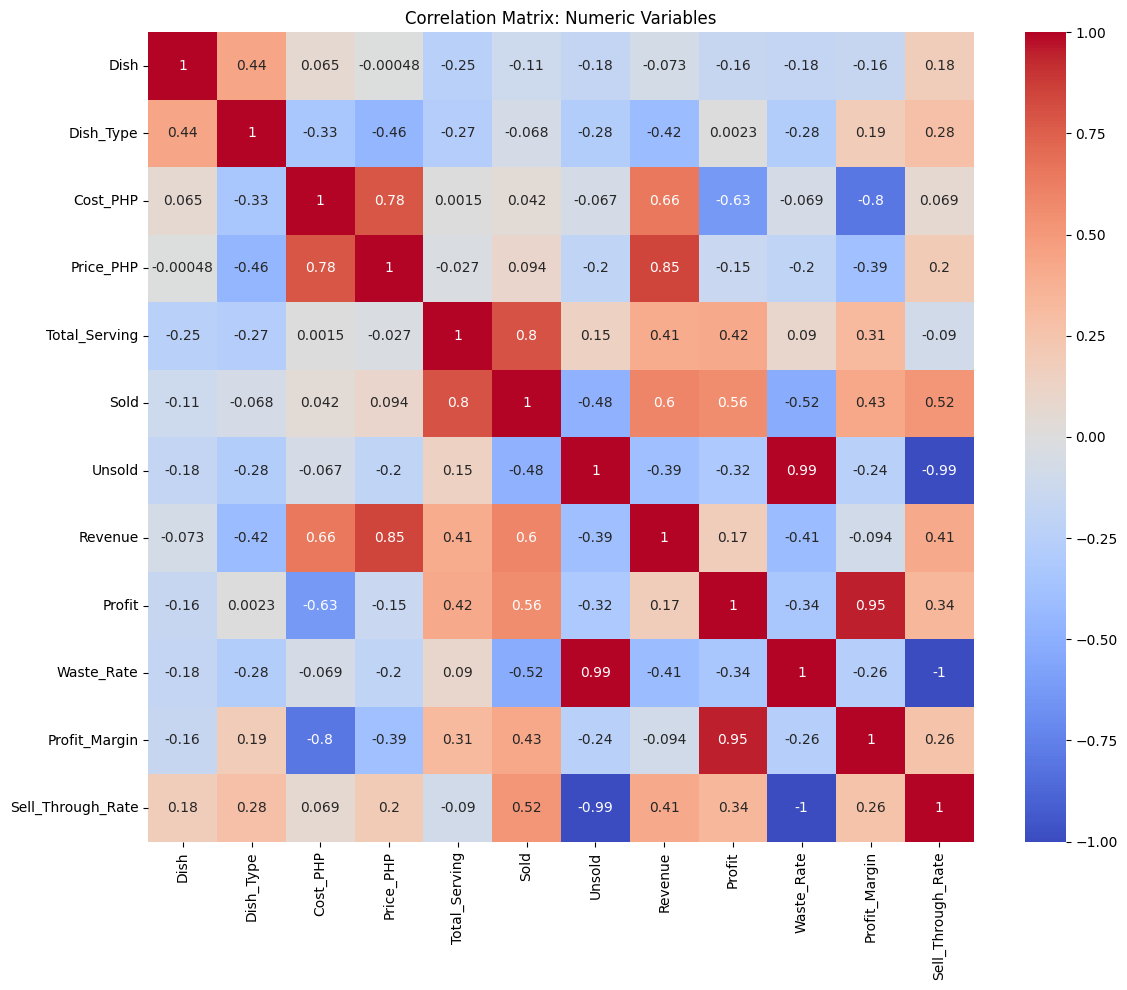

In [74]:
import seaborn as sns

correlation_matrix = data_numeric.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Matrix: Numeric Variables')
plt.tight_layout()
plt.show()


In [77]:
data.groupby("Dish")["Profit"].std()


Dish
Beef Steak               95.273768
Chicken Adobo            28.767748
Chicken BBQ               8.485281
Chicken Curry           140.199857
Chopsuey                 57.380310
Dinakdakan               90.595906
Fried Salmon             79.497310
Fried Tilapia           126.526545
Ginataang Kalabasa       38.723378
Ginataang Pagi          110.889134
Ginataang Tulingan       88.193915
Kalderetang Manok        92.030490
Labong                   66.126394
Laing                    52.325902
Monggo                   36.746882
Nilagang Baka            56.457738
Nilagang Pata            27.049338
Paksiw na Bangus        112.056190
Pork Adobo               77.719308
Pork Menudo              72.950821
Sinigang na Baboy        82.105623
Sisig                   112.404552
Tinolang Manok           56.255666
Yellow Fin Tuna Soup     81.211452
Name: Profit, dtype: float64

### latex

In [40]:
# from pylatex import Document, Section, Subsection, Command, NoEscape

# # -----------------------------
# # Create IEEE Document
# # -----------------------------
# doc = Document(documentclass="IEEEtran")

# # -----------------------------
# # Title Information
# # -----------------------------
# doc.preamble.append(Command('title',
#     'Profit and Waste Analysis of Repeating Menu Systems in a Filipino Eatery'))
# doc.preamble.append(Command('author', 'Author Name'))
# doc.append(NoEscape(r'\maketitle'))

# # -----------------------------
# # Abstract
# # -----------------------------
# with doc.create(Section("Abstract", numbering=False)):
#     doc.append(
#         "This study analyzes dish-level profitability and waste patterns "
#         "in a repeating menu system of a Filipino eatery. Using operational "
#         "batch data, revenue, profit, sell-through rates, and waste percentages "
#         "were computed to evaluate menu performance. Results highlight the "
#         "impact of menu composition and intra-menu competition on dish-level "
#         "outcomes. The findings demonstrate how descriptive data analytics can "
#         "support operational decision-making and improve production efficiency "
#         "in small-scale food enterprises."
#     )

# # =====================================================
# # CHAPTER 1 — INTRODUCTION
# # =====================================================
# with doc.create(Section("Introduction")):

#     with doc.create(Subsection("Background of the Study")):
#         doc.append(
#             "Small-scale food establishments often rely on experience-based "
#             "decision-making when selecting daily dish combinations and "
#             "production quantities. Repeating menu systems may produce "
#             "variability in profitability and unsold servings. This study "
#             "applies dish-level operational analytics to evaluate profit and "
#             "waste patterns in a structured menu cycle."
#         )

#     with doc.create(Subsection("Problem Statement")):
#         doc.append(
#             "Despite consistent menu rotation, variability in dish-level "
#             "profitability and unsold servings persists. The study investigates "
#             "how operational data can be used to evaluate and improve financial "
#             "performance while minimizing waste."
#         )

#     with doc.create(Subsection("Objectives of the Study")):
#         doc.append(
#             "1) Analyze dish-level profitability.\n"
#             "2) Measure waste using unsold quantity.\n"
#             "3) Compare performance across dish types.\n"
#             "4) Identify high and low performing dishes.\n"
#             "5) Provide data-driven menu recommendations."
#         )

#     with doc.create(Subsection("Scope and Limitations")):
#         doc.append(
#             "The study uses one month of operational batch data. "
#             "Customer-level transaction data and predictive modeling "
#             "are not included."
#         )

# # =====================================================
# # CHAPTER 2 — RELATED LITERATURE
# # =====================================================
# with doc.create(Section("Related Literature")):

#     with doc.create(Subsection("Menu Engineering")):
#         doc.append(
#             "Menu engineering evaluates dishes based on profitability "
#             "and sales performance to support pricing and production decisions."
#         )

#     with doc.create(Subsection("Food Waste in Food Service")):
#         doc.append(
#             "Food waste in small establishments is commonly caused by "
#             "demand uncertainty and overproduction. Sell-through rate is "
#             "a key operational metric."
#         )

#     with doc.create(Subsection("Data Analytics in Small Enterprises")):
#         doc.append(
#             "Descriptive and diagnostic analytics provide measurable insights "
#             "into operational efficiency and resource utilization."
#         )

# # =====================================================
# # CHAPTER 3 — METHODOLOGY
# # =====================================================
# with doc.create(Section("Methodology")):

#     with doc.create(Subsection("Research Design")):
#         doc.append(
#             "This study applies descriptive and diagnostic analytics to "
#             "evaluate dish-level performance in a repeating menu system."
#         )

#     with doc.create(Subsection("Dataset Description")):
#         doc.append(
#             "The dataset includes dish name, type, cost, price, total serving, "
#             "number sold, revenue, profit, and unsold quantity."
#         )

#     with doc.create(Subsection("Performance Metrics")):
#         doc.append(NoEscape(r"Revenue = Price $\times$ Number\_Sold \\"))
#         doc.append(NoEscape(r"Profit = Revenue - Cost \\"))
#         doc.append(NoEscape(r"SellThrough = Number\_Sold / Total\_Serving \\"))
#         doc.append(NoEscape(r"Waste\% = Unsold\_Quantity / Total\_Serving"))

#     with doc.create(Subsection("Analytical Procedure")):
#         doc.append(
#             "Profitability metrics were computed for each dish. "
#             "Dishes were ranked by profit and waste, aggregated by type, "
#             "and evaluated using a profit-waste performance matrix."
#         )

# # =====================================================
# # CHAPTER 4 — RESULTS AND DISCUSSION
# # =====================================================
# with doc.create(Section("Results and Discussion")):

#     with doc.create(Subsection("Profitability Analysis")):
#         doc.append(
#             "High-performing dishes contributed disproportionately "
#             "to total revenue, while certain dishes exhibited lower margins."
#         )

#     with doc.create(Subsection("Waste Analysis")):
#         doc.append(
#             "Waste levels varied across dish types, indicating production "
#             "imbalance and demand variability."
#         )

#     with doc.create(Subsection("Menu Composition Effects")):
#         doc.append(
#             "Chicken dishes exhibited increased unsold quantities when "
#             "served alongside multiple pork or beef dishes, indicating "
#             "intra-menu competition effects."
#         )

# # =====================================================
# # CHAPTER 5 — CONCLUSION
# # =====================================================
# with doc.create(Section("Conclusion")):
#     doc.append(
#         "Dish-level operational analytics provides measurable insights "
#         "into profitability and waste behavior. Menu composition influences "
#         "performance, and balancing dish types can improve efficiency. "
#         "Future work may incorporate predictive modeling and optimization."
#     )

# # -----------------------------
# # Generate .tex file
# # -----------------------------
# doc.generate_tex("profit_waste_ieee")
# print("LaTeX file generated: profit_waste_ieee.tex")

